In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string 
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\prati\\Downloads\\Alexa-Dataset.csv")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


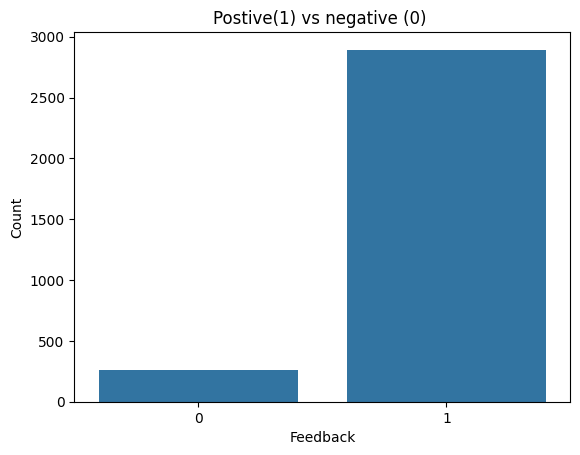

In [3]:
# plotting graph positive vs negative feedback
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df, x='feedback')
plt.title("Postive(1) vs negative (0) ")
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.show()

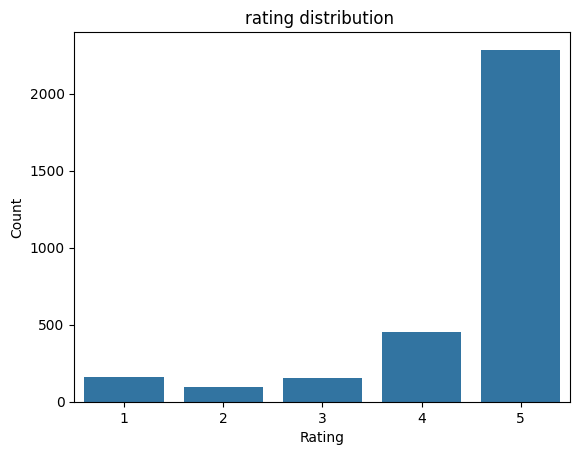

In [4]:
# graph of rating distribution 
sns.countplot(df,x='rating')
plt.title("rating distribution ")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [5]:
# review text into lower case 
df['cleaned_review']=df['verified_reviews'].str.lower()
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_review
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [6]:
#remove punctuation
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def remove_punctuation(text):
    if isinstance(text,str):
        return "".join([char for char in text if char not in string.punctuation])
    else:
        return ""
df["punctuation_free"]=df['cleaned_review'].apply(remove_punctuation)
df.head()
    


,rating,date,variation,verified_reviews,feedback,cleaned_review,punctuation_free
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music


In [8]:
# remove emoticons and emojis
emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags
            "]+", flags=re.UNICODE)
df["emoji_free"]=df['punctuation_free'].apply(lambda x: emoji_pattern.sub(r'',x))
df.head()
                           

,rating,date,variation,verified_reviews,feedback,cleaned_review,punctuation_free,emoji_free
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music


In [9]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['tokens']=df['emoji_free'].apply(word_tokenize)
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,rating,date,variation,verified_reviews,feedback,cleaned_review,punctuation_free,emoji_free,tokens
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo,"[love, my, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it,"[loved, it]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,"[sometimes, while, playing, a, game, you, can,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,"[i, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,[music]


In [10]:
#Remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
df['after_stopwords_removal']=df['tokens'].apply(lambda x:[word for word in x if word not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rating,date,variation,verified_reviews,feedback,cleaned_review,punctuation_free,emoji_free,tokens,after_stopwords_removal
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo,"[love, my, echo]","[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it,"[loved, it]",[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,"[sometimes, while, playing, a, game, you, can,...","[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,"[i, have, had, a, lot, of, fun, with, this, th...","[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,[music],[music]


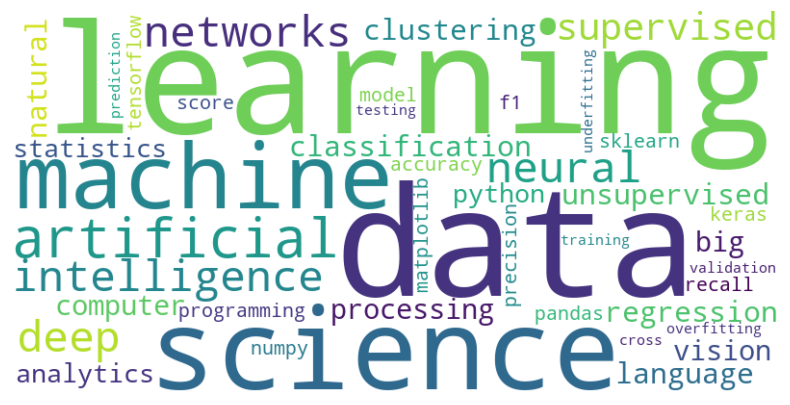

In [11]:
# wordcloud 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
doc="data science machine learning artificial intelligence deep learning neural networks supervised unsupervised regression classification clustering natural language processing computer vision big data analytics statistics python programming pandas numpy matplotlib sklearn tensorflow keras model accuracy precision recall f1-score overfitting underfitting cross-validation training testing prediction"
wordcloud=WordCloud(width=800,height=400, background_color='white').generate(doc)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# stemming and lemmatization on review text
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

# apply stemming 
df["stemmed"]=df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
df.head()

# apply lemmaztion
df['lemmatizer']=df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,rating,date,variation,verified_reviews,feedback,cleaned_review,punctuation_free,emoji_free,tokens,after_stopwords_removal,stemmed,lemmatizer
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo,"[love, my, echo]","[love, echo]","[love, my, echo]","[love, my, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it,"[loved, it]",[loved],"[love, it]","[loved, it]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,"[sometimes, while, playing, a, game, you, can,...","[sometimes, playing, game, answer, question, c...","[sometim, while, play, a, game, you, can, answ...","[sometimes, while, playing, a, game, you, can,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,"[i, have, had, a, lot, of, fun, with, this, th...","[lot, fun, thing, 4, yr, old, learns, dinosaur...","[i, have, had, a, lot, of, fun, with, thi, thi...","[i, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,[music],[music],[music],[music]


In [13]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [14]:
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')

# Example tokens
tokens = ['this', 'is', 'an', 'example', 'sentence']

# Get part-of-speech tags
pos_tags = pos_tag(tokens)

print(pos_tags)

[('this', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('example', 'NN'), ('sentence', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
#word vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X_bow=vectorizer.fit_transform(df['emoji_free'])
print (X_bow)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 60898 stored elements and shape (3150, 4485)>
  Coords	Values
  (0, 2394)	1
  (0, 2582)	1
  (0, 1313)	1
  (1, 2395)	1
  (1, 2152)	1
  (2, 2152)	1
  (2, 3632)	1
  (2, 4374)	2
  (2, 2933)	1
  (2, 1687)	1
  (2, 4462)	3
  (2, 699)	1
  (2, 342)	1
  (2, 3107)	1
  (2, 980)	1
  (2, 664)	1
  (2, 271)	1
  (2, 3388)	1
  (2, 1756)	1
  (2, 4442)	1
  (2, 336)	2
  (2, 345)	1
  (2, 3953)	1
  (2, 3372)	1
  (2, 407)	1
  :	:
  (3148, 3684)	1
  (3148, 3102)	2
  (3148, 3989)	1
  (3148, 1739)	1
  (3148, 679)	1
  (3148, 1256)	1
  (3148, 3626)	1
  (3148, 1649)	1
  (3148, 1655)	1
  (3148, 1263)	2
  (3148, 1937)	1
  (3148, 3875)	1
  (3148, 2218)	1
  (3148, 2143)	1
  (3148, 2552)	1
  (3148, 1977)	1
  (3148, 443)	1
  (3148, 2261)	1
  (3148, 4470)	1
  (3148, 3770)	1
  (3148, 885)	1
  (3148, 2509)	1
  (3148, 1936)	1
  (3148, 608)	1
  (3149, 1747)	1


In [16]:
#tf-idf calculation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x_tfidf=tfidf.fit_transform(df['emoji_free'])
print(x_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 60898 stored elements and shape (3150, 4485)>
  Coords	Values
  (0, 2394)	0.5551762334690563
  (0, 2582)	0.5372073054792
  (0, 1313)	0.634970598320024
  (1, 2395)	0.9490618345895225
  (1, 2152)	0.3150898826137863
  (2, 2152)	0.06111450266104422
  (2, 3632)	0.19025691354191185
  (2, 4374)	0.3438421444970554
  (2, 2933)	0.1719210722485277
  (2, 1687)	0.2766557537488602
  (2, 4462)	0.3432041098319385
  (2, 699)	0.10741425277633582
  (2, 342)	0.19545604985165105
  (2, 3107)	0.21845251202680385
  (2, 980)	0.23148039758847705
  (2, 664)	0.09822348006103719
  (2, 271)	0.10190202041765395
  (2, 3388)	0.20157167177530932
  (2, 1756)	0.14534596512786288
  (2, 4442)	0.21845251202680385
  (2, 336)	0.13394427518405205
  (2, 345)	0.21069393323477872
  (2, 3953)	0.06302579189498574
  (2, 3372)	0.1802543657961904
  (2, 407)	0.11137603212802777
  :	:
  (3148, 3684)	0.12090327619631829
  (3148, 3102)	0.19972309893191392
  (3148, 3989)	0.12595